In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("C:/Users/navne\Desktop/spam_ham_dataset.csv/spam_ham_dataset.csv", index_col=0)

In [3]:
data.head()

,label,text,label_num
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4685,spam,"Subject: photoshop , windows , office . cheap ...",1
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
data.shape

(5171, 3)

## Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 605 to 4807
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 161.6+ KB


In [6]:
# check for missing values
data.isnull().sum()

label        0
text         0
label_num    0
dtype: int64

In [7]:
# check for dupplicate values
data.duplicated().sum()

178

In [8]:
# remove duplicate values
data=data.drop_duplicates(keep='first')

In [9]:
data.duplicated().sum()

0

In [10]:
data.shape

(4993, 3)

## EDA

In [11]:
data.head()

,label,text,label_num
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4685,spam,"Subject: photoshop , windows , office . cheap ...",1
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [12]:
data['label'].value_counts()

ham     3531
spam    1462
Name: label, dtype: int64

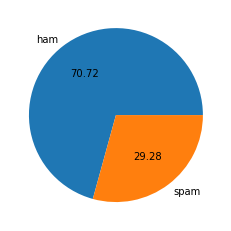

In [13]:
import matplotlib.pyplot as plt
plt.pie(data['label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [14]:
# data is imbalanced

In [15]:
import nltk # natural language tool kit

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\navne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# num of characters
data['num_characters']=data['text'].apply(len)

In [18]:
data.head()

,label,text,label_num,num_characters
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [19]:
# num of words
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
data.head()

,label,text,label_num,num_characters,num_words
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [21]:
# num of sentences
data['num_sentences']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
data.head()

,label,text,label_num,num_characters,num_words,num_sentences
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [23]:
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,10.202884
std,1547.863387,340.702932,22.003030
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,3.000000
50%,557.000000,125.000000,6.000000
75%,1262.000000,288.000000,12.000000
max,32258.000000,8863.000000,1163.000000


In [24]:
# ham msg
data[data['label_num']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,8.804871
std,1402.785831,337.018933,22.303918
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,3.000000
50%,538.000000,128.000000,5.000000
75%,1253.500000,298.500000,10.000000
max,32258.000000,8863.000000,1163.000000


In [25]:
# spam msg
data[data['label_num']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,13.579343
std,1840.112883,349.439381,20.883535
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,3.000000
50%,589.000000,119.500000,8.000000
75%,1305.000000,252.750000,15.000000
max,22073.000000,3963.000000,331.000000


In [26]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

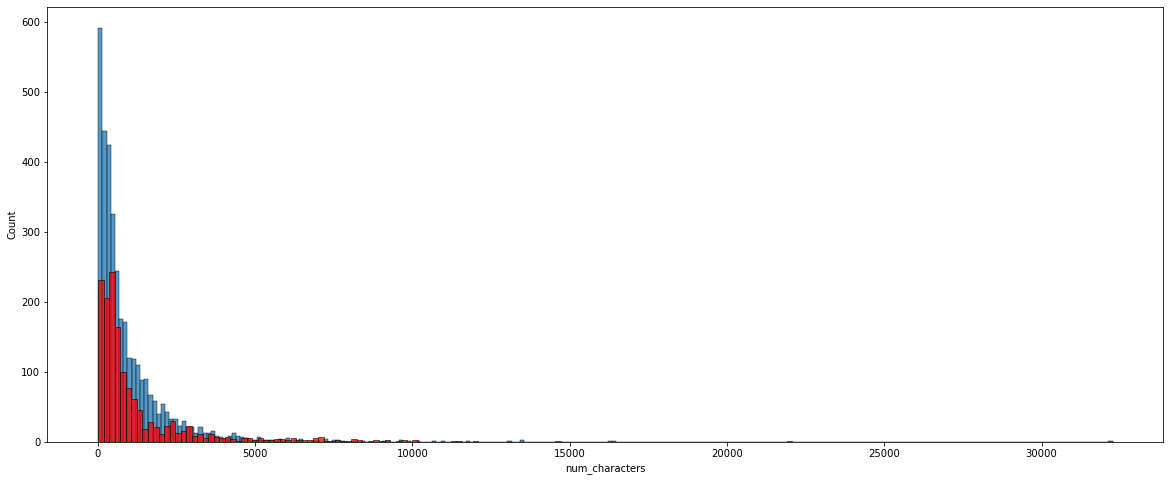

In [27]:
plt.figure(figsize=(20,8))
sns.histplot(data[data['label_num']==0]['num_characters'])
sns.histplot(data[data['label_num']==1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

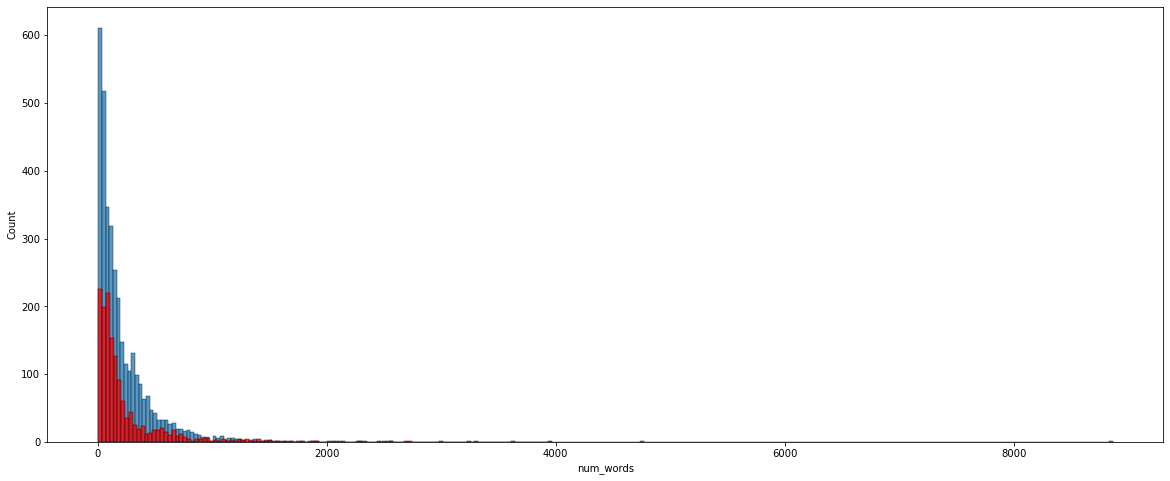

In [28]:
plt.figure(figsize=(20,8))
sns.histplot(data[data['label_num']==0]['num_words'])
sns.histplot(data[data['label_num']==1]['num_words'], color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

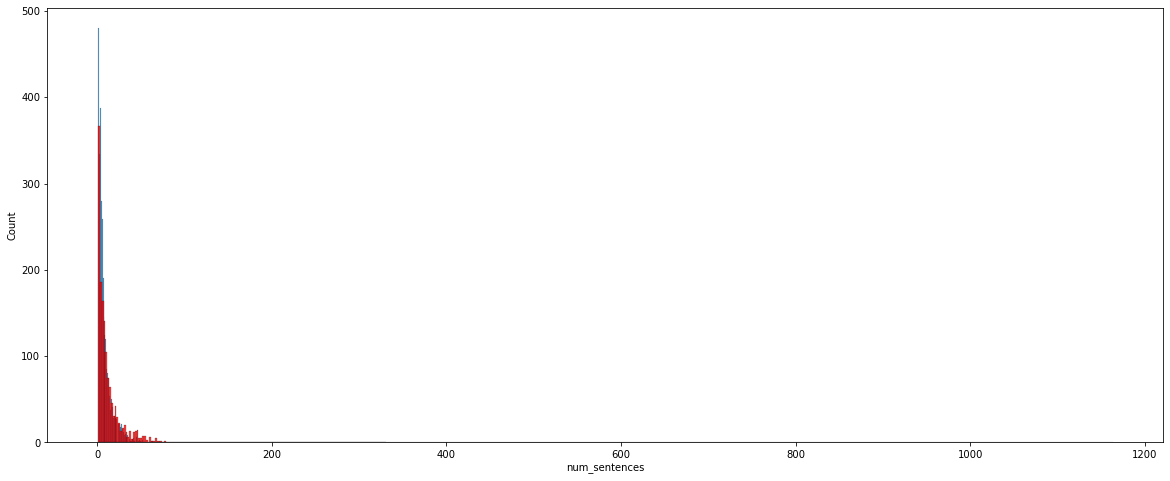

In [29]:
plt.figure(figsize=(20,8))
sns.histplot(data[data['label_num']==0]['num_sentences'])
sns.histplot(data[data['label_num']==1]['num_sentences'], color='red')

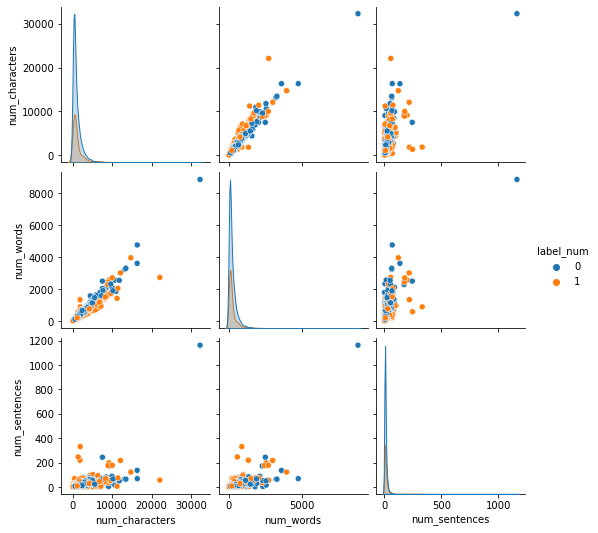

In [30]:
sns.pairplot(data, hue='label_num')

C:\Users\navne\AppData\Local\Temp\ipykernel_18068\1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot:>

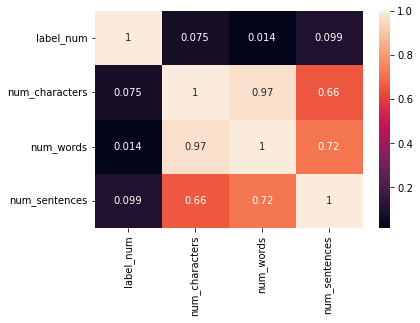

In [31]:
sns.heatmap(data.corr(), annot=True)

## Data Preprocessing
- Lower Case
- Tokenization
- Removing Special Characters
- Removing Stop Words and Punctuation
- Stemming

In [32]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
     
    
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    
    # convert into root words
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)

In [33]:
transform_text("Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .")

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [34]:
data['transformed_text'] = data['text'].apply(transform_text)

In [35]:
data.head()

,label,text,label_num,num_characters,num_words,num_sentences,transformed_text
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1,subject hpl nom januari 9 2001 see attach file...
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20,subject neon retreat ho ho ho around wonder ti...
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [36]:
from wordcloud import WordCloud

In [37]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

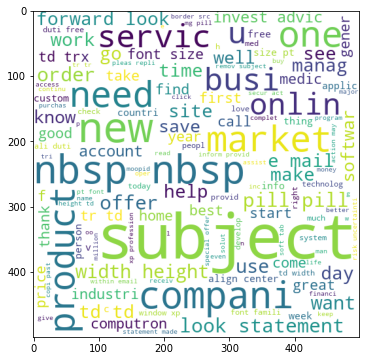

In [38]:
spam_wc = wc.generate(data[data['label_num']==1]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

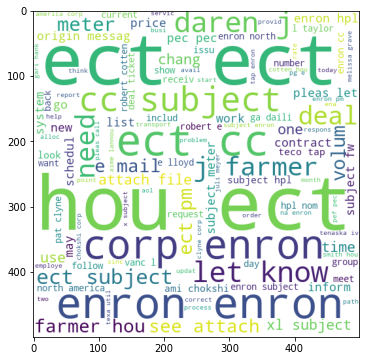

In [39]:
ham_wc = wc.generate(data[data['label_num']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [40]:
data.head()

,label,text,label_num,num_characters,num_words,num_sentences,transformed_text
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1,subject hpl nom januari 9 2001 see attach file...
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20,subject neon retreat ho ho ho around wonder ti...
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [41]:
spam_corpus=[]
for msg in data[data['label_num']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
len(spam_corpus)

196592

C:\Users\navne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


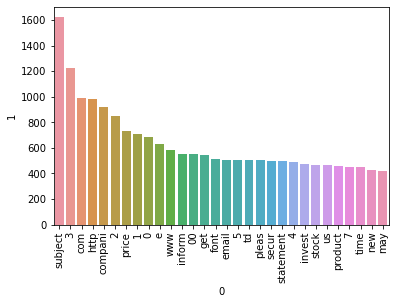

In [43]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
ham_corpus=[]
for msg in data[data['label_num']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [45]:
len(ham_corpus)

380475

C:\Users\navne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


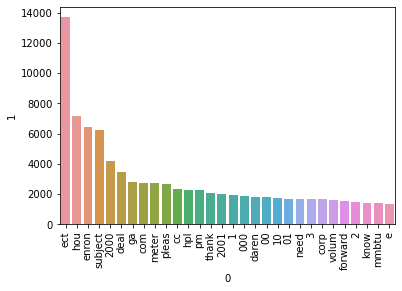

In [46]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [47]:
# Text Vectorization
# Using Bag of Words
data.head()

,label,text,label_num,num_characters,num_words,num_sentences,transformed_text
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1,subject hpl nom januari 9 2001 see attach file...
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20,subject neon retreat ho ho ho around wonder ti...
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=17000)

In [49]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [50]:
X.shape

(4993, 17000)

In [51]:
y = data['label_num'].values

In [52]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
mnb = MultinomialNB()

In [57]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.963963963963964
[[690   7]
 [ 29 273]]
0.975


In [58]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))